<a href="https://colab.research.google.com/github/blkeyd/CVPR/blob/main/MID/Assignment1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [6]:
import numpy as np
import cv2
import random
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

# Connect Drive

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Path and *Catagories*

In [7]:
dataset = '/content/drive/MyDrive/animal_dataset/animal_dataset'

categories = os.listdir(dataset)
categories = [c for c in categories if not c.startswith('.')]
print(categories)

['dog', 'cat', 'panda']


# Label Mapping

In [8]:
mapLabels = {categories[i]: i for i in range(len(categories))}

print("Label Mapping:", mapLabels)

Label Mapping: {'dog': 0, 'cat': 1, 'panda': 2}


# Load and Process Imagee

In [9]:
data = []

for category in tqdm(categories, desc = 'Loading Images: '):
    path = os.path.join(dataset, category)
    classNumber = mapLabels[category]

    for img in os.listdir(path):
        imgArray = os.path.join(path, img)

        try:
            img = cv2.imread(imgArray, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Skipping corrupted file: {imgArray}")
                continue

            img = cv2.resize(img, (32, 32))
            img = img / 255.0

            data.append((img, classNumber))

        except Exception as e:
            print(f"Error loading {imgArray}: {e}")
            continue

print("\nTotal Images:", len(data))

Loading Images: 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]


Total Images: 300


# Inspect Data

In [10]:
img, label = data[0]
print("Label:", label)

print("Array shape:", img.shape)
print(img)

Label: 0
Array shape: (32, 32)
[[0.31764706 0.23921569 0.18431373 ... 0.69411765 0.64705882 0.64313725]
 [0.49411765 0.22352941 0.16862745 ... 0.15294118 0.45882353 0.44705882]
 [0.21176471 0.16862745 0.18823529 ... 0.19215686 0.42352941 0.2745098 ]
 ...
 [0.68235294 0.60392157 0.40784314 ... 0.47058824 0.49803922 0.44313725]
 [0.61960784 0.6627451  0.79215686 ... 0.57647059 0.22745098 0.49803922]
 [0.65490196 0.50588235 0.85882353 ... 0.48235294 0.6745098  0.65490196]]


# Prepare Data for training

In [11]:
random.shuffle(data)

X = np.array([img for img, label in data]).reshape(-1, 32, 32, 1)

Y = np.array([label for img, label in data])

print("Total samples:", X.shape)

Total samples: (300, 32, 32, 1)


# Visualize image

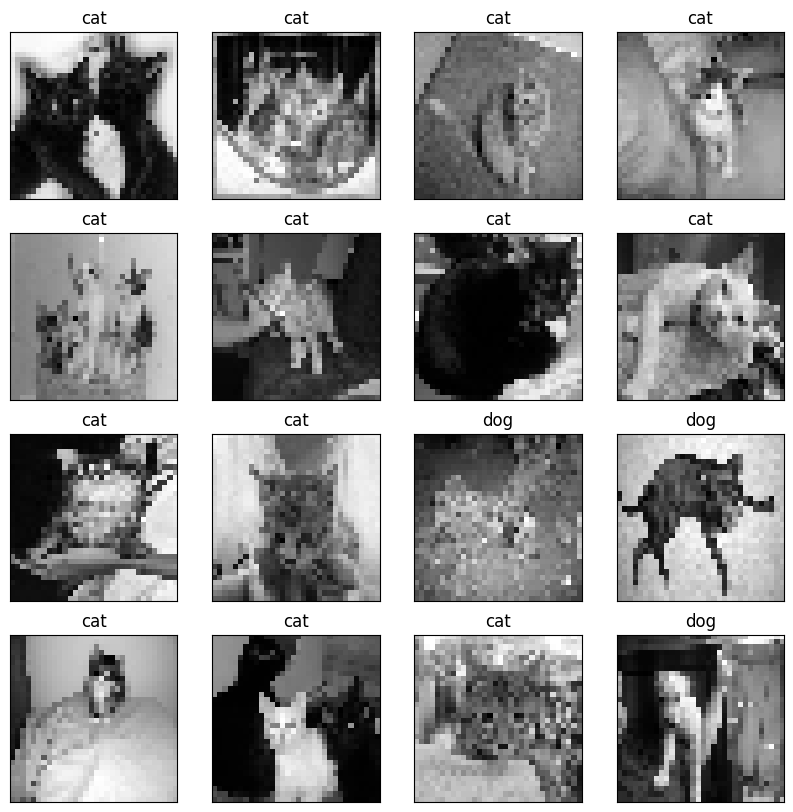

In [12]:
plt.figure(figsize=(10,10))
for i in range(16):
    index = random.randint(0, len(X)-1)
    plt.subplot(4,4,i+1)
    plt.imshow(X[index].reshape(32,32), cmap='gray')
    classNumber = Y[index]
    className = [k for k,v in mapLabels.items() if v == classNumber][0]
    plt.title(className)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [13]:
XFlat = X.reshape(len(X), -1)

In [14]:
def l1(x1, x2):
    return np.sum(np.abs(x1 - x2)) # For l1

def l2(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2)) #  For l2

In [15]:
def knnPredict(xTrain, yTrain, xTest, k = 5, distance_metric = "L2"):
    distances = []

    for i in range(len(xTrain)):
        if distance_metric == "L1":
            dist = l1(xTrain[i], xTest)
        else:
            dist = l2(xTrain[i], xTest)

        distances.append((dist, yTrain[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = [distances[i][1] for i in range(k)]
    return max(set(neighbors), key=neighbors.count)

# Five Field Cross Validation

In [16]:
def fiveFoldCrossValidation(X, y, kValues, distance="L2"):
    foldSize = len(X) // 5
    results = {k: [] for k in kValues}

    for fold in range(5):
        start = fold * foldSize
        end = start + foldSize

        xValue = X[start:end]
        yValue = Y[start:end]

        xTrainFold = np.concatenate((X[:start], X[end:]))
        yTrainFold = np.concatenate((Y[:start], Y[end:]))

        print(f"\nFold {fold+1} — Distance: {distance}")

        for k in kValues:
            correct = 0
            for i in range(len(xValue)):
                pred = knnPredict(xTrainFold, yTrainFold, xValue[i], k, distance)
                if pred == yValue[i]:
                    correct += 1

            acc = correct / len(xValue)
            results[k].append(acc)
            print(f"K={k} Accuracy: {acc*100:.2f}%")

    return results

kValues = [1,3,5,7, 9]

l2Results = fiveFoldCrossValidation(XFlat, Y, kValues, distance="L2")
l1Results = fiveFoldCrossValidation(XFlat, Y, kValues, distance="L1")


Fold 1 — Distance: L2
K=1 Accuracy: 23.33%
K=3 Accuracy: 25.00%
K=5 Accuracy: 21.67%
K=7 Accuracy: 26.67%
K=9 Accuracy: 31.67%

Fold 2 — Distance: L2
K=1 Accuracy: 43.33%
K=3 Accuracy: 35.00%
K=5 Accuracy: 28.33%
K=7 Accuracy: 35.00%
K=9 Accuracy: 36.67%

Fold 3 — Distance: L2
K=1 Accuracy: 33.33%
K=3 Accuracy: 31.67%
K=5 Accuracy: 40.00%
K=7 Accuracy: 38.33%
K=9 Accuracy: 46.67%

Fold 4 — Distance: L2
K=1 Accuracy: 35.00%
K=3 Accuracy: 35.00%
K=5 Accuracy: 33.33%
K=7 Accuracy: 36.67%
K=9 Accuracy: 36.67%

Fold 5 — Distance: L2
K=1 Accuracy: 35.00%
K=3 Accuracy: 46.67%
K=5 Accuracy: 46.67%
K=7 Accuracy: 43.33%
K=9 Accuracy: 40.00%

Fold 1 — Distance: L1
K=1 Accuracy: 18.33%
K=3 Accuracy: 26.67%
K=5 Accuracy: 25.00%
K=7 Accuracy: 25.00%
K=9 Accuracy: 28.33%

Fold 2 — Distance: L1
K=1 Accuracy: 36.67%
K=3 Accuracy: 40.00%
K=5 Accuracy: 30.00%
K=7 Accuracy: 33.33%
K=9 Accuracy: 41.67%

Fold 3 — Distance: L1
K=1 Accuracy: 40.00%
K=3 Accuracy: 40.00%
K=5 Accuracy: 43.33%
K=7 Accuracy: 46.6

# Summery the result

In [17]:
def Results(results, name):
    print(f'Summary result of {name}')
    averageAccuracy = {}

    for k, accList in results.items():
        average = np.mean(accList)
        averageAccuracy[k] = average
        print(f"K={k} → Avg Accuracy: {average*100:.2f}%")

    # best k
    bestK = max(averageAccuracy, key=averageAccuracy.get)
    bestAccuracy = averageAccuracy[bestK]

    print(f"Best K for {name} = {bestK} with Accuracy = {bestAccuracy*100:.2f}%\n")
    return bestAccuracy, bestK

l1bestAccuracy, l1BestK = Results(l1Results, "L1(Manhattan) Distance")
l2bestAccuracy, l2BestK = Results(l2Results, "L2(Euclidean) Distance")

if l2bestAccuracy > l1bestAccuracy:
    print(f"L2(Euclidean) distance is better ({l2bestAccuracy*100:.2f}%) compared to L1(Manhattan) distance ({l1bestAccuracy*100:.2f}%)")
else:
    print(f"L1(Manhattan) distance is better ({l1bestAccuracy*100:.2f}%) compared to L2(Euclidean) distance ({l2bestAccuracy*100:.2f}%)")


Summary result of L1(Manhattan) Distance
K=1 → Avg Accuracy: 35.67%
K=3 → Avg Accuracy: 39.33%
K=5 → Avg Accuracy: 37.67%
K=7 → Avg Accuracy: 37.67%
K=9 → Avg Accuracy: 40.67%
Best K for L1(Manhattan) Distance = 9 with Accuracy = 40.67%

Summary result of L2(Euclidean) Distance
K=1 → Avg Accuracy: 34.00%
K=3 → Avg Accuracy: 34.67%
K=5 → Avg Accuracy: 34.00%
K=7 → Avg Accuracy: 36.00%
K=9 → Avg Accuracy: 38.33%
Best K for L2(Euclidean) Distance = 9 with Accuracy = 38.33%

L1(Manhattan) distance is better (40.67%) compared to L2(Euclidean) distance (38.33%)


# L1 Graph

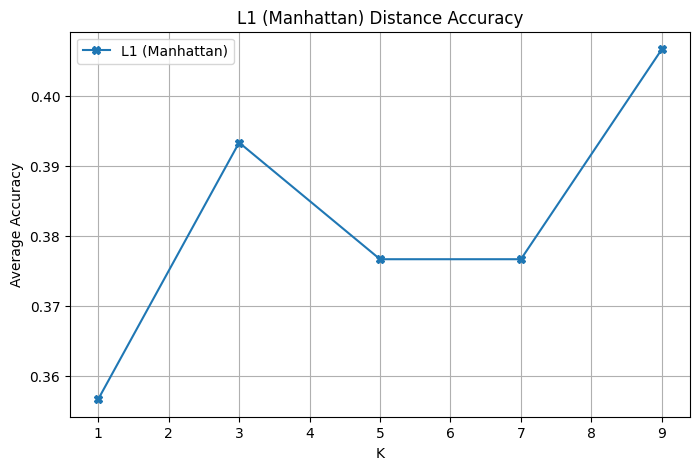

In [18]:
#  L1 Only
averageL1 = [np.mean(l1Results[k]) for k in kValues]

plt.figure(figsize=(8,5))
plt.plot(kValues, averageL1, marker='X', label="L1 (Manhattan)")
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.title("L1 (Manhattan) Distance Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# L2 Graph

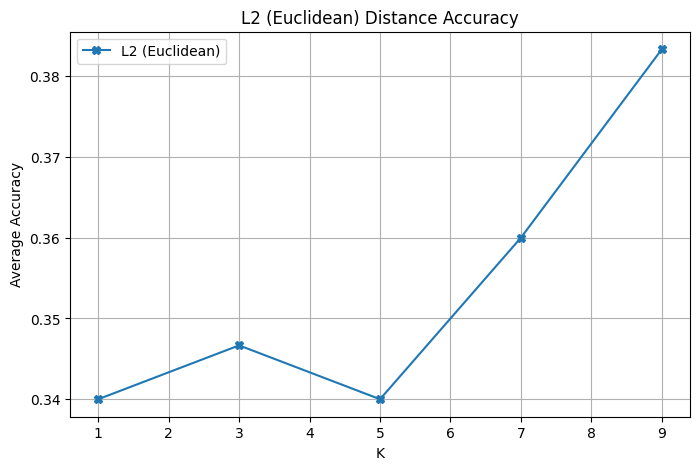

In [19]:
#  L2 Only
averageL2 = [np.mean(l2Results[k]) for k in kValues]

plt.figure(figsize=(8,5))
plt.plot(kValues, averageL2, marker='X', label="L2 (Euclidean)")
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.title("L2 (Euclidean) Distance Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# L1 + L2 Combined graph

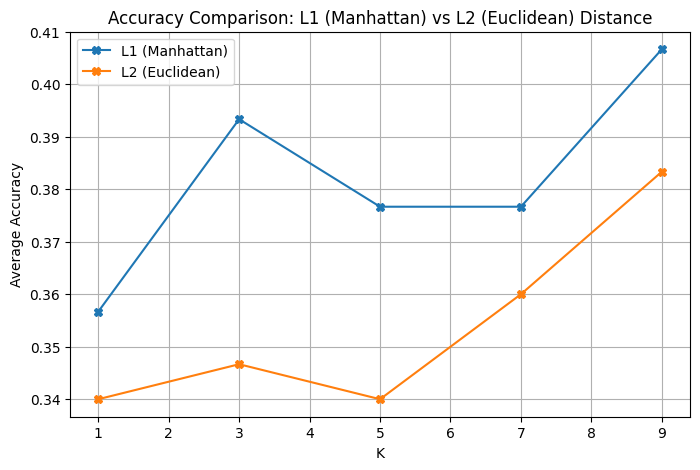

In [20]:
averageL1 = [np.mean(l1Results[k]) for k in kValues]
averageL2 = [np.mean(l2Results[k]) for k in kValues]

plt.figure(figsize=(8,5))
plt.plot(kValues, averageL1, marker='X', label="L1 (Manhattan)")
plt.plot(kValues, averageL2, marker='X', label="L2 (Euclidean)")
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.title("Accuracy Comparison: L1 (Manhattan) vs L2 (Euclidean) Distance")
plt.grid(True)
plt.legend()
plt.show()

# Top 5 predections using KNN

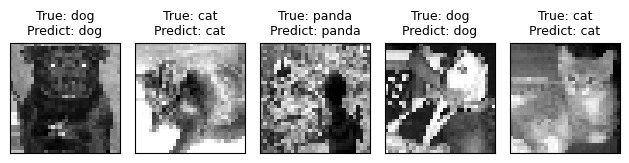

In [21]:
def topfivePredictions(index):
    distances = []
    for i in range(len(XFlat)):
        dist = l2(XFlat[index], XFlat[i])
        distances.append((dist, Y[i]))

    distances.sort(key=lambda x: x[0])
    top5 = distances[:5]
    return [y for d, y in top5]

for i in range(5):
    index = random.randint(0, len(XFlat) - 1)

    img = X[index].reshape(32,32)

    tLabel = Y[index]
    trueLabels = list(mapLabels.keys())[list(mapLabels.values()).index(tLabel)]

    preds = topfivePredictions(index)
    p = preds[0]
    predictionLabels = list(mapLabels.keys())[list(mapLabels.values()).index(p)]

    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {trueLabels}\nPredict: {predictionLabels}", fontsize=9)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# **Discussion**
The results from the 5-fold cross-validation show that the Manhattan (L1) distance performs slightly better than the Euclidean (L2) distance for this gray scale image dataset. L1 achieves a highest accuracy of 40.67% at K = 9, while L2 reaches 38.33% at K = 9. This difference can be explained by the characteristics of the dataset gray-scale pixel values often contain noise, intensity variations, and small local differences. L2 distance is more sensitive to these variations because it squares the differences, making it more affected by outliers. In contrast, L1 treats each pixel difference equally and is therefore more robust for this type of data.

Both distance metrics show moderate accuracy, indicating limitations such as low-level raw pixel features and possible class similarity. Improving the dataset preprocessing, normalizing pixel values, or using feature extraction methods could enhance classification performance. Overall, L1 is better suited for this dataset due to its stability and robustness.

